# **Bank Churn Data Exploration And Churn Prediction**

#### Dataset Link: https://www.kaggle.com/code/thomaskonstantin/bank-churn-data-exploration-and-churn-prediction/notebook

#### Steps to complete the project

1. Filling or removing missing data.

2. Removing outliers from data.

3. Balancing data.

4. Removing useless columns.

5. As here we will be using LightGBM, so first we convert `object` Dtype to `category` Dtype.

6. Splitting the dataset into training and validation sets.

8. Model building.

9. Model Hyperparameter tuning.

10. Printing classification report and confusion matrix of the trained model.

11. Saving the model.

12. Deploying the model locally using flask.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Projects/Bank Customer Churn Prediction/BankChurners.csv')

df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Removing NULL values

In [5]:
# Import pandas library
import pandas as pd

# Define a function that takes a list of column names as an argument
def print_unique_items(columns):
  # Create an empty dictionary to store the results
  result = {}
  # Loop through each column name in the list
  for col in columns:
    # Check if the column name is valid
    if col in df.columns:
      # Get the unique items in the column as a list
      unique_items = df[col].unique().tolist()
      # Assign the list as the value for the column name key in the result dictionary
      result[col] = unique_items
    else:
      # Print an error message if the column name is invalid
      print(f"{col} is not a valid column name")
  # Print the result dictionary with a new line after each key-value pair
  print("{")
  for key, value in result.items():
    print(f"    '{key}': {value},")
  print("}")

# Call the function with a list of column names
print_unique_items(['Attrition_Flag',  'Gender',
       'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'])

{
    'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
    'Gender': ['M', 'F'],
    'Education_Level': ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate'],
    'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
    'Income_Category': ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown'],
    'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum'],
}


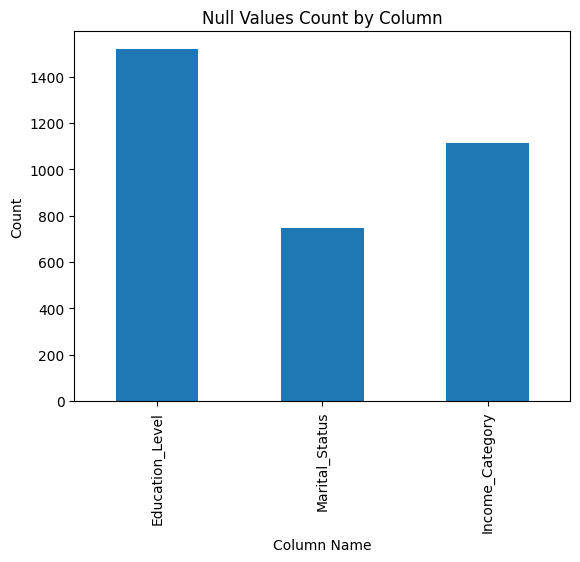

In [6]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical computing
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

df = df.replace ('Unknown', np.nan)
null_counts = df.isna ().sum () # a series of null counts for each column
null_counts = null_counts [null_counts > 0] # a series of null counts for columns with null values
null_counts.plot (kind='bar', title='Null Values Count by Column', xlabel='Column Name', ylabel='Count')
plt.show ()

#### From above its clear that 3 columns have NULL values and that too very high in quantity so we have 3 options to fix this:
1. Delete the entire column.
2. Replace missing values with the most frequent values.
3. Delete rows with null values.
4. Predict values using a Classifier Algorithm (supervised or unsupervised).

Here we drop the NULL rows.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           9015 non-null   object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
df = df.dropna(axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7081 non-null   int64  
 1   Attrition_Flag            7081 non-null   object 
 2   Customer_Age              7081 non-null   int64  
 3   Gender                    7081 non-null   object 
 4   Dependent_count           7081 non-null   int64  
 5   Education_Level           7081 non-null   object 
 6   Marital_Status            7081 non-null   object 
 7   Income_Category           7081 non-null   object 
 8   Card_Category             7081 non-null   object 
 9   Months_on_book            7081 non-null   int64  
 10  Total_Relationship_Count  7081 non-null   int64  
 11  Months_Inactive_12_mon    7081 non-null   int64  
 12  Contacts_Count_12_mon     7081 non-null   int64  
 13  Credit_Limit              7081 non-null   float64
 14  Total_R

### Removing outliers from the dataset

In [9]:
# Import pandas library
import pandas as pd

# Define a function to identify outliers based on the interquartile range (IQR) method
def find_outliers(col):
  # Calculate the first and third quartiles (Q1 and Q3) of the column
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  # Calculate the IQR as the difference between Q3 and Q1
  IQR = Q3 - Q1
  # Define the lower and upper bounds for outliers as 1.5 times the IQR below Q1 and above Q3
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Return a boolean mask that indicates which values are outliers
  return (col < lower_bound) | (col > upper_bound)

# Loop through the numeric columns of the dataset and apply the find_outliers function
for col in df.select_dtypes(include=["int64", "float64"]).columns:
  # Get the boolean mask of outliers for the current column
  outliers = find_outliers(df[col])
  # Drop the rows that contain outliers from the dataset
  df = df[~outliers]

# Print the shape of the dataset after removing outliers
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
14,712396908,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,...,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
25,771071958,Existing Customer,41,F,3,Graduate,Single,Less than $40K,Blue,28,...,1,2,7768.0,1669,6099.0,0.797,1051,22,0.833,0.215
34,787937058,Existing Customer,58,M,0,Graduate,Married,$80K - $120K,Blue,49,...,2,2,12555.0,1696,10859.0,0.519,1291,24,0.714,0.135
35,715318008,Existing Customer,55,F,1,College,Single,Less than $40K,Blue,36,...,2,1,3520.0,1914,1606.0,0.510,1407,43,0.483,0.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,710081208,Attrited Customer,52,M,2,College,Single,$120K +,Blue,32,...,3,1,4935.0,0,4935.0,0.713,7886,64,0.882,0.000
9954,714879483,Attrited Customer,39,M,4,Graduate,Married,$80K - $120K,Blue,31,...,3,3,3929.0,542,3387.0,0.811,7773,64,0.730,0.138
10022,716832858,Attrited Customer,46,M,3,Graduate,Married,$60K - $80K,Blue,34,...,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,827440458,Attrited Customer,48,M,4,College,Married,$80K - $120K,Blue,44,...,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152


### Balancing the dataset by undersampling

In [10]:
# Import pandas library
import pandas as pd

# Use the value_counts method to get the frequency of each class in the target column
counts = df["Attrition_Flag"].value_counts()

# Print the counts
print(counts)

Existing Customer    3740
Attrited Customer     745
Name: Attrition_Flag, dtype: int64


For balancing we have some methods:
1. Undersampling
2. Oversampling
3. SMOTE

But here we tried with SMOTE and Undersampling and using SMOTE we were getting accuracy, precision and recall of around 96% but using Undersampling we got around 93% and using Undersampling there is very less risk of overfitting as compared to SMOTE or Oversampling so we decided to use Undersampling

In [11]:
# Import pandas library
import pandas as pd

# Separate the dataset into two subsets based on the target column
df_majority = df[df["Attrition_Flag"] == "Existing Customer"]
df_minority = df[df["Attrition_Flag"] == "Attrited Customer"]

# Get the number of samples in the minority class
n_minority = len(df_minority)

# Randomly sample the same number of samples from the majority class
df_majority_sampled = df_majority.sample(n_minority, random_state=42)

# Concatenate the two subsets to form a balanced dataset
df = pd.concat([df_majority_sampled, df_minority])

# Print the shape and value counts of the balanced dataset
print(df["Attrition_Flag"].value_counts())

Existing Customer    745
Attrited Customer    745
Name: Attrition_Flag, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 8207 to 10067
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 1490 non-null   int64  
 1   Attrition_Flag            1490 non-null   object 
 2   Customer_Age              1490 non-null   int64  
 3   Gender                    1490 non-null   object 
 4   Dependent_count           1490 non-null   int64  
 5   Education_Level           1490 non-null   object 
 6   Marital_Status            1490 non-null   object 
 7   Income_Category           1490 non-null   object 
 8   Card_Category             1490 non-null   object 
 9   Months_on_book            1490 non-null   int64  
 10  Total_Relationship_Count  1490 non-null   int64  
 11  Months_Inactive_12_mon    1490 non-null   int64  
 12  Contacts_Count_12_mon     1490 non-null   int64  
 13  Credit_Limit              1490 non-null   float64
 14  Tota

### Removing useless columns

CLIENTNUM column is useless so we remove it

In [13]:
df = df.drop(['CLIENTNUM'], axis=1)

df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8207,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,32,2,3,1,2890.0,1392,1498.0,0.736,4233,77,0.791,0.482
2801,Existing Customer,43,M,3,Graduate,Single,$80K - $120K,Blue,31,6,2,4,12165.0,0,12165.0,1.160,4066,74,0.682,0.000
1117,Existing Customer,29,M,0,Graduate,Married,$40K - $60K,Blue,36,3,3,4,1459.0,590,869.0,1.164,2229,52,1.080,0.404
4984,Existing Customer,52,F,3,Graduate,Married,Less than $40K,Blue,39,4,3,3,2001.0,909,1092.0,0.772,4238,63,0.800,0.454
5779,Existing Customer,39,F,3,Graduate,Married,Less than $40K,Blue,27,3,3,2,1902.0,962,940.0,0.534,4203,69,0.725,0.506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,Attrited Customer,52,M,2,College,Single,$120K +,Blue,32,4,3,1,4935.0,0,4935.0,0.713,7886,64,0.882,0.000
9954,Attrited Customer,39,M,4,Graduate,Married,$80K - $120K,Blue,31,1,3,3,3929.0,542,3387.0,0.811,7773,64,0.730,0.138
10022,Attrited Customer,46,M,3,Graduate,Married,$60K - $80K,Blue,34,1,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,Attrited Customer,48,M,4,College,Married,$80K - $120K,Blue,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152


### Splitting dataset into train and validation

Before splitting the dataset we convert object dtype column into category dtype as we will be using LightGBM algorithm which accepts categorical variables without applying OHE

In [17]:
for c in df.columns:
    col_type = df[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        df[c] = df[c].astype('category')

In [18]:
from sklearn.model_selection import train_test_split

# Define your features and target variables
X = df.drop('Attrition_Flag', axis=1) # Features are all the columns except weight
y = df['Attrition_Flag'] # Target is the weight column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model building

Reference - https://www.kaggle.com/code/mlisovyi/beware-of-categorical-features-in-lgbm#Model-fitting

In [19]:
!pip install lightgbm

In [20]:
import lightgbm as lgb

fit_params={"early_stopping_rounds":10,
            "eval_metric" : 'auc',
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }


#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 1000 define only the absolute maximum
clf = lgb.LGBMClassifier(num_leaves= 15, max_depth=-1,
                         random_state=314,
                         silent=True,
                         metric='None',
                         n_jobs=4,
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1)

#force larger number of max trees and smaller learning rate
clf.fit(X_train, y_train, **fit_params)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future rel

LGBMClassifier(colsample_bytree=0.9, metric='None', n_estimators=1000, n_jobs=4,
               num_leaves=15, random_state=314, silent=True, subsample=0.9)

### Post model analysis

Classification report and confusion matrix

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.95      0.94      0.94       155
Existing Customer       0.93      0.94      0.94       143

         accuracy                           0.94       298
        macro avg       0.94      0.94      0.94       298
     weighted avg       0.94      0.94      0.94       298

Confusion Matrix:
[[145  10]
 [  8 135]]


### Saving the model

In [22]:
import pickle

# Save model
with open('/content/bank_churn_lightgbm.pkl', 'wb') as f:
  pickle.dump(clf, f)

Checking if our model is saved correctly

In [23]:
with open('/content/bank_churn_lightgbm.pkl', 'rb') as f:
   clf_model = pickle.load(f)
   print(clf_model) # Print right after loading

LGBMClassifier(colsample_bytree=0.9, metric='None', n_estimators=1000, n_jobs=4,
               num_leaves=15, random_state=314, silent=True, subsample=0.9)
